In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
folders = '/content/drive/MyDrive/dataset'

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow
import PIL.ImageOps  
import numpy as np
from skimage.feature import hog

In [ ]:
list_folders = (sorted(os.listdir(folders)))
print(list_folders)
print(len(list_folders))

['a', 'à', 'á', 'â', 'ầ', 'ấ', 'ẫ', 'ẩ', 'ã', 'ă', 'ằ', 'ắ', 'ẵ', 'ẳ', 'ả', 'ạ', 'ậ', 'ặ', 'b', 'c', 'd', 'e', 'è', 'é', 'ê', 'ề', 'ế', 'ễ', 'ể', 'ẽ', 'ẻ', 'ẹ', 'ệ', 'g', 'h', 'i', 'ì', 'í', 'ĩ', 'ỉ', 'ị', 'k', 'l', 'm', 'n', 'o', 'ò', 'ó', 'ô', 'ồ', 'ố', 'ỗ', 'ổ', 'õ', 'ỏ', 'ơ', 'ờ', 'ớ', 'ỡ', 'ở', 'ợ', 'ọ', 'ộ', 'p', 'q', 'r', 's', 't', 'u', 'ù', 'ú', 'ũ', 'ủ', 'ư', 'ừ', 'ứ', 'ữ', 'ử', 'ự', 'ụ', 'v', 'x', 'y', 'ỳ', 'ý', 'ỹ', 'ỷ', 'ỵ', 'đ']
89


In [ ]:
FJoin = os.path.join

In [ ]:
#for i in list_folders:
  #os.mkdir('/content/drive/MyDrive/Bin_data_crop' + '/' + i)

In [ ]:
#example = Image.open('/content/drive/MyDrive/dataset/ỗ/image_898.JPG')
#plt.imshow(example)

In [ ]:
#for link in chars:
    #imgs = [FJoin(link, imgs) for imgs in os.listdir(link)]
    #for img_link in imgs:
        #img = Image.open(img_link)
        #img = img.crop((3, 3, 80, 80))                          # note: crop((left, top, right, bottom))
        #img.save(img_link)

In [ ]:
#for link in chars:
  #list_name_img = os.listdir(link)
  #count = 0
  #for name_img in list_name_img:
    #os.chdir(link)
    #os.rename(name_img, str(count) + '.jpg')
    #count = count + 1

In [ ]:
def crop_img(image):
  thresh, inImg = cv2.threshold(image, 140, 255, cv2.THRESH_BINARY)
  inImg = 255 - inImg

  maxTop = inImg.shape[0]//2
  maxBot = inImg.shape[0]//2
  maxLeft = inImg.shape[1]//2
  maxRight = inImg.shape[1]//2

  for i in range(inImg.shape[0]):
    for j in range(inImg.shape[1]):
      if inImg[i][j] > 160:
        if maxTop >= i: maxTop = i
        if maxBot <= i: maxBot = i
        if maxLeft >= j: maxLeft = j
        if maxRight <= j: maxRight = j

  editedImg = inImg[maxTop:maxBot+1, maxLeft:maxRight+1] 
  return editedImg

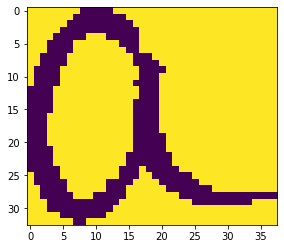

In [ ]:
img = cv2.imread('/content/drive/MyDrive/dataset/a/5.jpg', 0)
editedImg = crop_img(img)
editedImg = cv2.bitwise_not(editedImg)
cv2.imwrite('/content/drive/MyDrive/test.jpg', editedImg)
plt.imshow(editedImg)

In [ ]:
#for char in list_folders:
  #count = 0
  #for img_name in os.listdir('/content/drive/MyDrive/dataset/' + char):
    #img = cv2.imread('/content/drive/MyDrive/dataset/' + char + '/' + img_name)
    #editedImg = crop_img(img)
    #editedImg = cv2.bitwise_not(editedImg)
    #try:
      #cv2.imwrite('/content/drive/MyDrive/Bin_data_crop/' + char + '/' + str(count) + '.jpg', editedImg)
      #count += 1
    #except:
      #continue

In [ ]:
f_data_final = ['a', 'à', 'á', 'â', 'ầ', 'ấ', 'ẫ', 'ẩ', 'ã', 'ă', 'ằ', 'ắ', 'ẵ', 'ẳ', 'ả', 'ạ', 'ậ', 'ặ', 'b', 'c', 'd', 'e', 'è', 'é', 'ê', 'ề', 'ế', 'ễ', 'ể', 'ẽ', 'ẻ', 'ẹ', 'ệ', 'g', 'h', 'i', 'ì', 'í', 'ĩ', 'ỉ', 'ị', 'k', 'l', 'm', 'n', 'o', 'ò', 'ó', 'ô', 'ồ', 'ố', 'ỗ', 'ổ', 'õ', 'ỏ', 'ơ', 'ờ', 'ớ', 'ỡ', 'ở', 'ợ', 'ọ', 'ộ', 'p', 'q', 'r', 's', 't', 'u', 'ù', 'ú', 'ũ', 'ủ', 'ư', 'ừ', 'ứ', 'ữ', 'ử', 'ự', 'ụ', 'v', 'x', 'y', 'ỳ', 'ý', 'ỹ', 'ỷ', 'ỵ', 'đ']
print(f_data_final)

['a', 'à', 'á', 'â', 'ầ', 'ấ', 'ẫ', 'ẩ', 'ã', 'ă', 'ằ', 'ắ', 'ẵ', 'ẳ', 'ả', 'ạ', 'ậ', 'ặ', 'b', 'c', 'd', 'e', 'è', 'é', 'ê', 'ề', 'ế', 'ễ', 'ể', 'ẽ', 'ẻ', 'ẹ', 'ệ', 'g', 'h', 'i', 'ì', 'í', 'ĩ', 'ỉ', 'ị', 'k', 'l', 'm', 'n', 'o', 'ò', 'ó', 'ô', 'ồ', 'ố', 'ỗ', 'ổ', 'õ', 'ỏ', 'ơ', 'ờ', 'ớ', 'ỡ', 'ở', 'ợ', 'ọ', 'ộ', 'p', 'q', 'r', 's', 't', 'u', 'ù', 'ú', 'ũ', 'ủ', 'ư', 'ừ', 'ứ', 'ữ', 'ử', 'ự', 'ụ', 'v', 'x', 'y', 'ỳ', 'ý', 'ỹ', 'ỷ', 'ỵ', 'đ']


In [ ]:
#for char in f_data_final:
    #link = '/content/drive/MyDrive/final_data_processed' + '/' + char
    #for img_name in os.listdir(link):
        #img = cv2.imread(link + '/' + img_name)
        #img_resized = cv2.resize(img, (16, 20))
        #cv2.imwrite('/content/drive/MyDrive/datatrain_16x20/' + char + '/' + img_name, img_resized)

In [ ]:
#for char in f_data_final:
  #link = '/content/drive/MyDrive/datatrain_16x20' + '/' + char
  #list_name_img = os.listdir(link)
  #count = 0
  #for name_img in list_name_img:
    #os.chdir(link)
    #os.rename(name_img, 'pic_' + str(count) + '.jpg')
    #count+=1

(20, 16, 3)


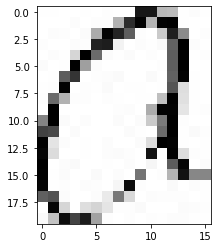

In [ ]:
example = cv2.imread('/content/drive/MyDrive/datatrain_16x20/a/pic_0.jpg')
print(example.shape)
plt.imshow(example)

In [ ]:
def change_Arr(link, label):
    list_arr = []
    for img_link in link:
        img = Image.open(img_link).convert('L')   ## to change the img into 1D array
        im, imghog = hog(img, pixels_per_cell=(2, 2), cells_per_block=(2, 2), visualize=True)
        list_arr.append(np.asarray(imghog).flatten())
        plt.imshow(imghog)
    return np.array(list_arr), np.array(label)

In [ ]:
link_img_train = []
label_img_train = []

index = 0
for char in f_data_final:
    link = '/content/drive/MyDrive/datatrain_16x20' + '/' + char
    list_name_img = os.listdir(link)
    for name_img in list_name_img:
        link_img_train.append(link + '/' + name_img)
        label_img_train.append(index)
    index += 1

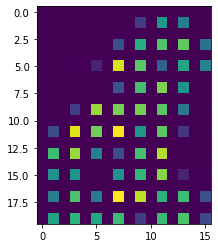

In [ ]:
data_train_final, label_train_final = change_Arr(link_img_train, label_img_train)

In [ ]:
pd.DataFrame(data_train_final).to_csv('/content/drive/MyDrive/Dataframe_training_final_HOG.csv', header= None, index=None)

In [ ]:
pd.DataFrame(label_train_final).to_csv('/content/drive/MyDrive/Labelframe_training_final_HOG.csv', header= None, index=None)

In [ ]:
link_img_test = []
label_img_test = []

index = 0
for char in f_data_final:
    link = '/content/drive/MyDrive/datatest_16x20' + '/' + char
    list_name_img = os.listdir(link)
    for name_img in list_name_img:
        link_img_test.append(link + '/' + name_img)
        label_img_test.append(index)
    index += 1

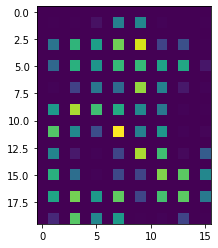

In [ ]:
data_test_final, label_test_final = change_Arr(link_img_test, label_img_test)

In [ ]:
pd.DataFrame(data_test_final).to_csv('/content/drive/MyDrive/Dataframe_testing_final_HOG.csv', header= None, index=None)

In [ ]:
pd.DataFrame(label_test_final).to_csv('/content/drive/MyDrive/Labelframe_testing_final_HOG.csv', header= None, index=None)